In [2]:
%load_ext autoreload
%autoreload 2

# Ablation Experiment Results

In [1]:
from capo.analysis.utils import (
    get_results,
    # aggregate_results,
    # get_prompt_scores,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    # plot_population_scores,
    # plot_population_members,
    plot_population_scores_comparison,
    plot_length_score,
)

In [ ]:
# CAPO    # EVO     # CAPO_MUT    # EVO_MUT
colors = ["#1b9e77", "#7570b3", "#66D874", "#9570b2"]
markers = ["o", "o", "d", "d"]

In [4]:
DATASETS = ["agnews", "gsm8k"]

## No Racing

Failed to load agnews for : No objects to concatenate
Failed to load gsm8k for : No objects to concatenate


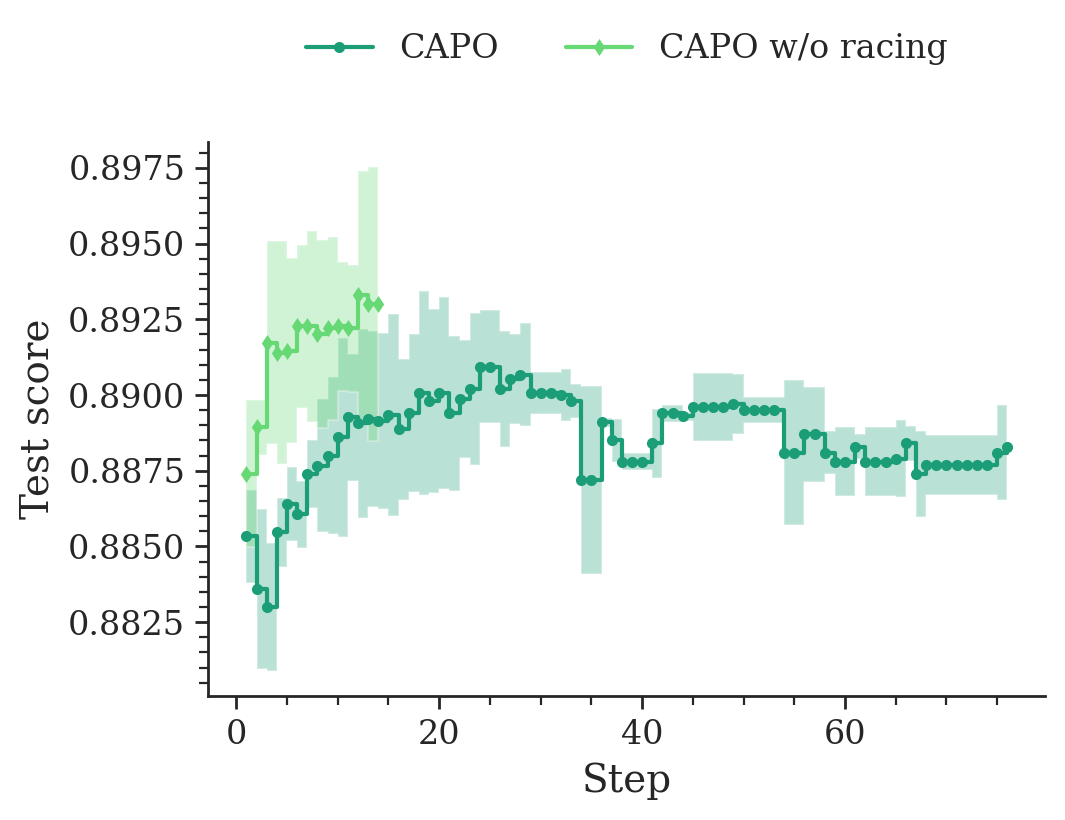

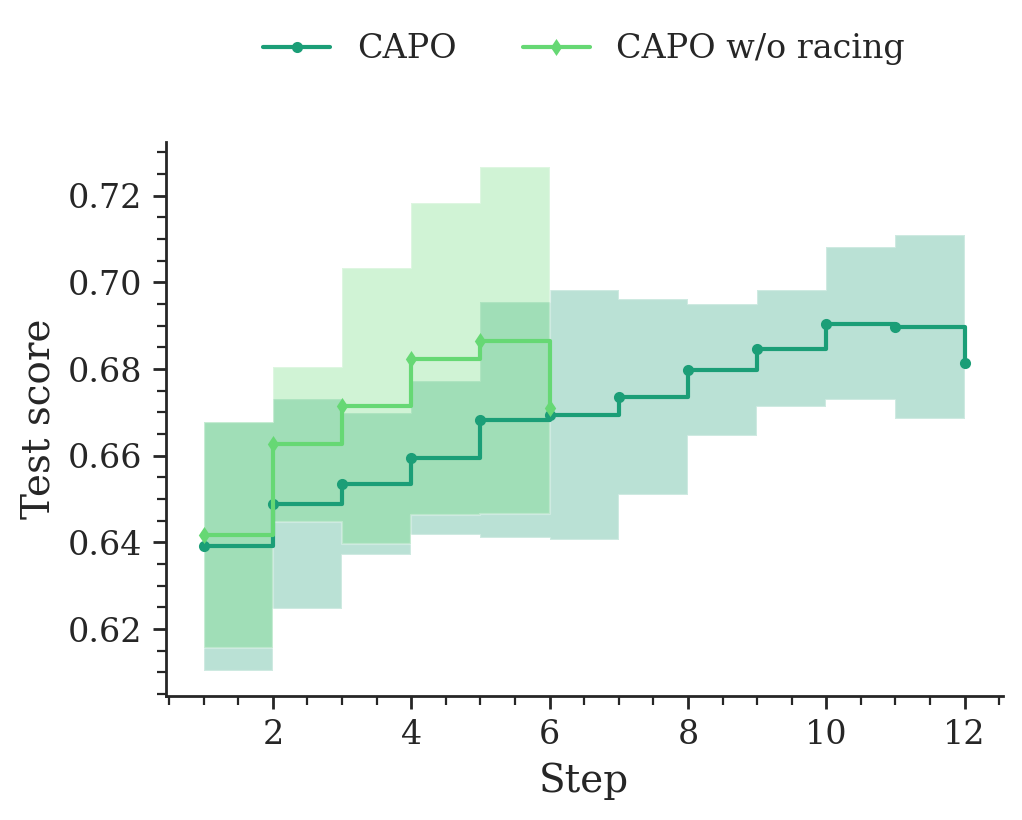

In [14]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "", "CAPO_no_racing"],
        labels=["CAPO", "", "CAPO w/o racing"],
        path_prefix="../..",
        plot_stddev=True,
        x_col="step",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- we can do much more steps if we do racing (3x for agnews/2x for gsm8k) with the 5 mio budget.
- in case of gsm8k we increase in performance, while for agnews we are worse than the no racing version
- performance differences lie really close to each other (within one sd)

Failed to load agnews for : No objects to concatenate
Failed to load gsm8k for : No objects to concatenate


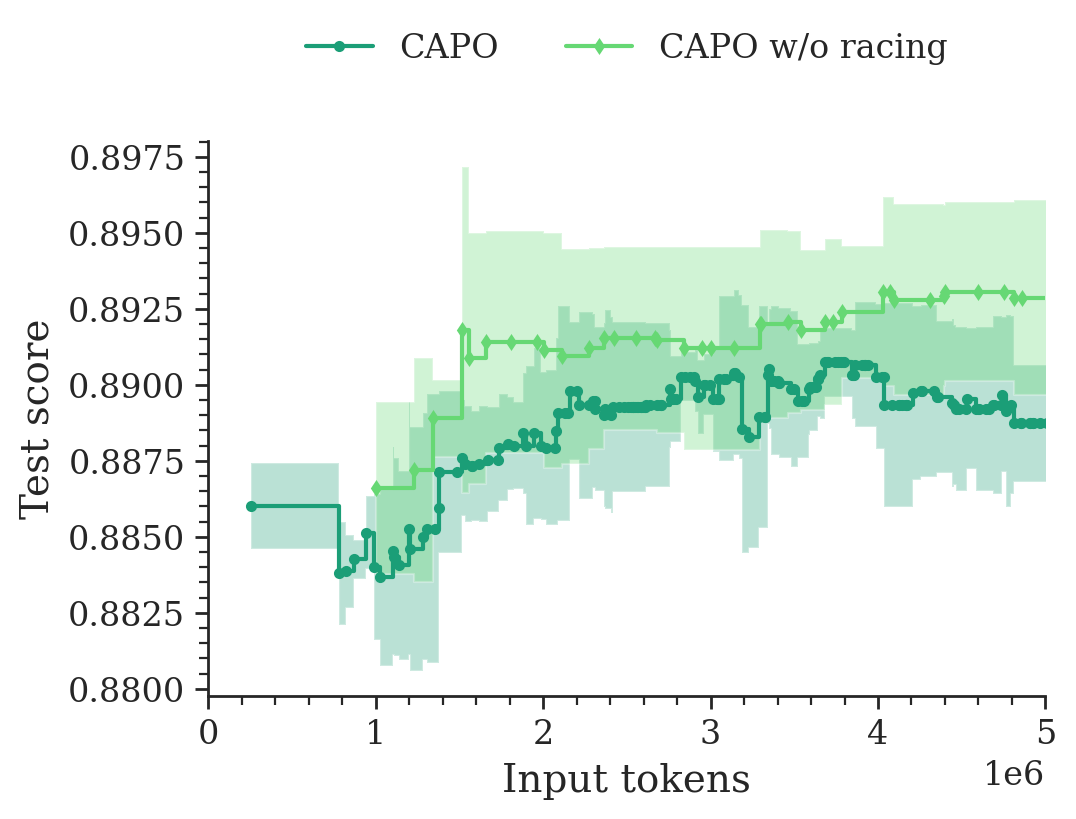

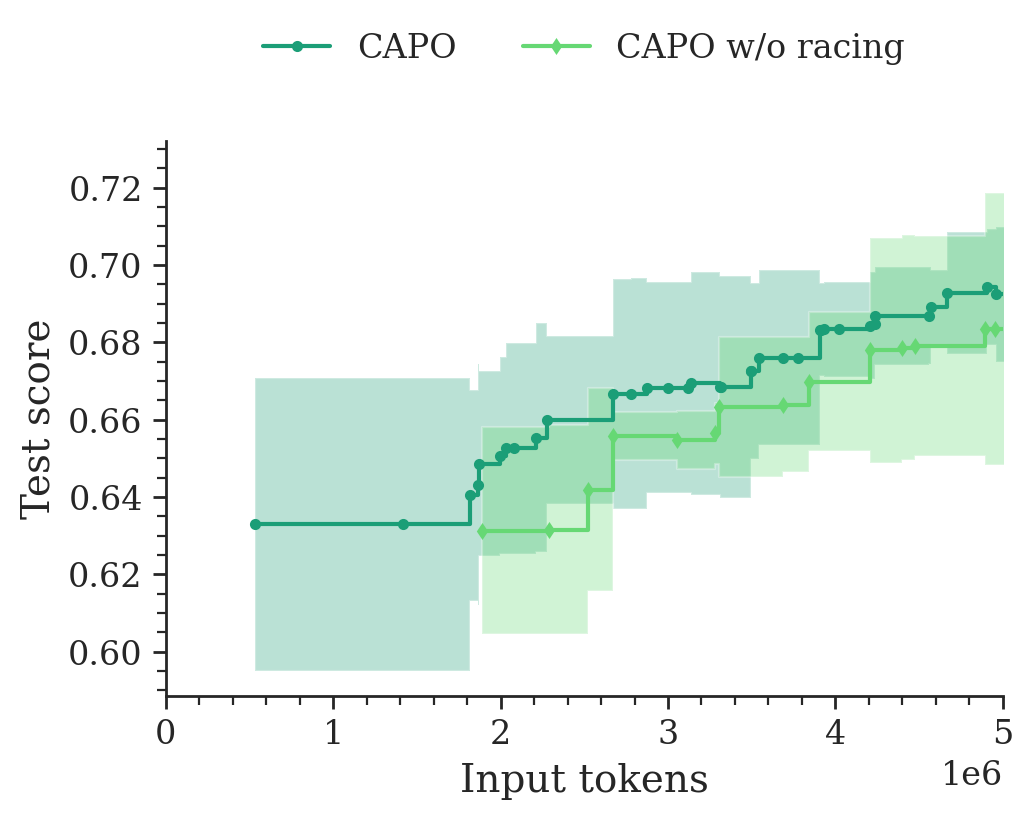

In [ ]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "", "CAPO_no_racing"],
        labels=["CAPO", "", "CAPO w/o racing"],
        path_prefix="../..",
        plot_stddev=True,
        plot_seeds=False,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- first results available after less tokens invested (about 500.000 tokens earlier for all seeds)
- in other seeds the results are already available much earlier (after just a couple of 100k tokens)

In [7]:
generate_comparison_table(DATASETS, ["CAPO", "CAPO_no_racing"], "llama", path_prefix="../..")

,agnews,gsm8k,avg
CAPO,88.80±0.92,73.73±4.57,81.27
CAPO_no_racing,89.20±0.53,75.00±3.82,82.10


## Shuffling

Failed to load agnews for nan: No objects to concatenate
Failed to load gsm8k for nan: No objects to concatenate


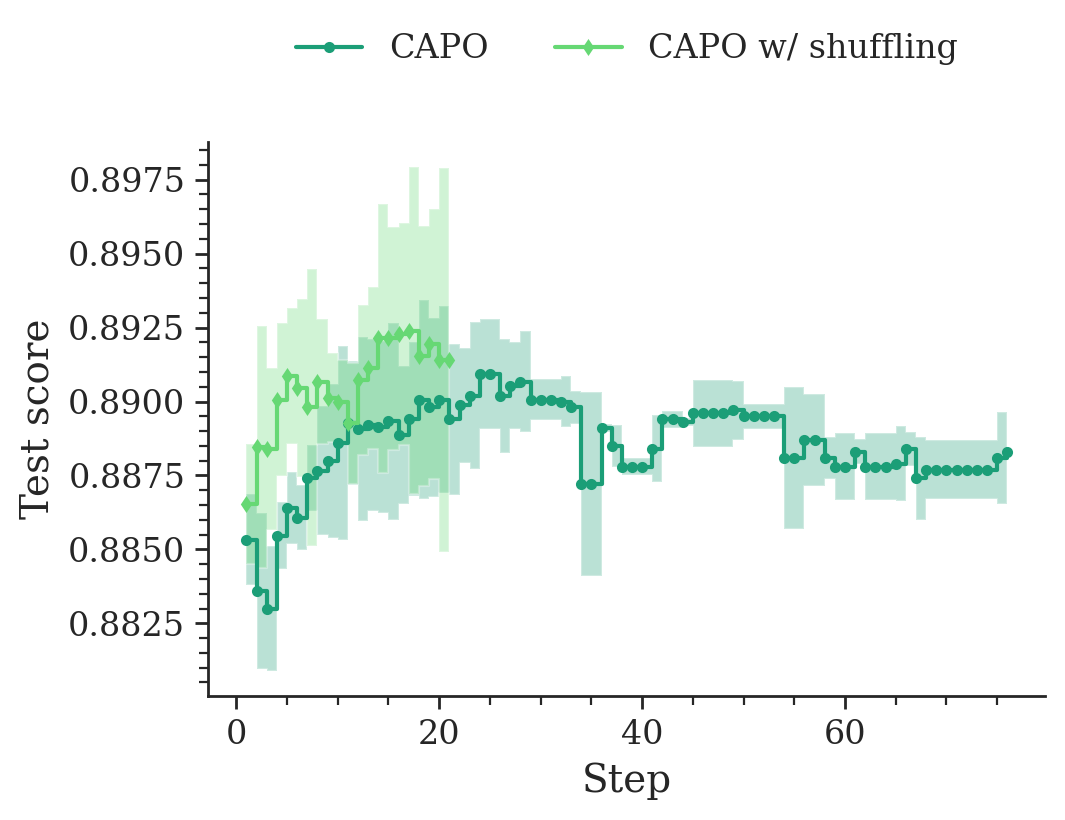

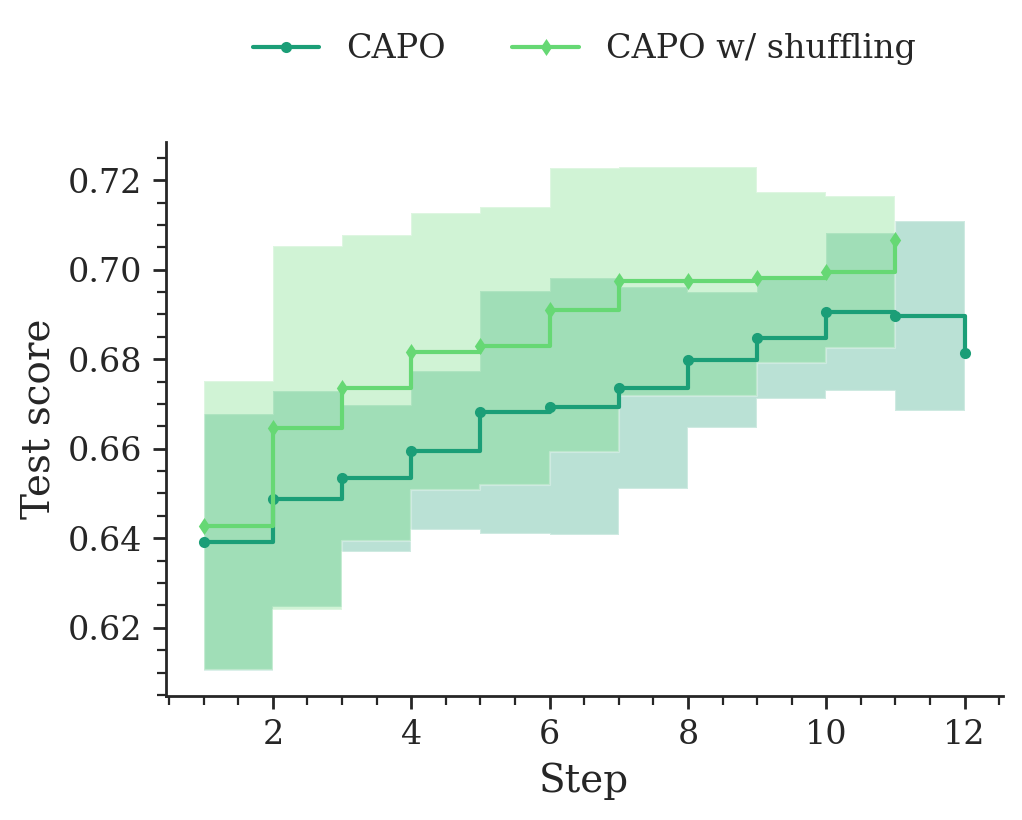

In [12]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "nan", "CAPO_shuffling"],
        path_prefix="../..",
        plot_stddev=True,
        x_col="step",
        colors=colors,
        markers=markers,
        labels=["CAPO", "", "CAPO w/ shuffling"],
        ncols=2,
    )

In [74]:
generate_comparison_table(DATASETS, ["CAPO", "CAPO_shuffling"], "llama", path_prefix="../..")

,agnews,gsm8k,avg
CAPO,88.80Â±0.75,73.73Â±3.73,81.27
CAPO_shuffling,89.60Â±0.28,76.73Â±1.81,83.17


## Zero Shot Performance

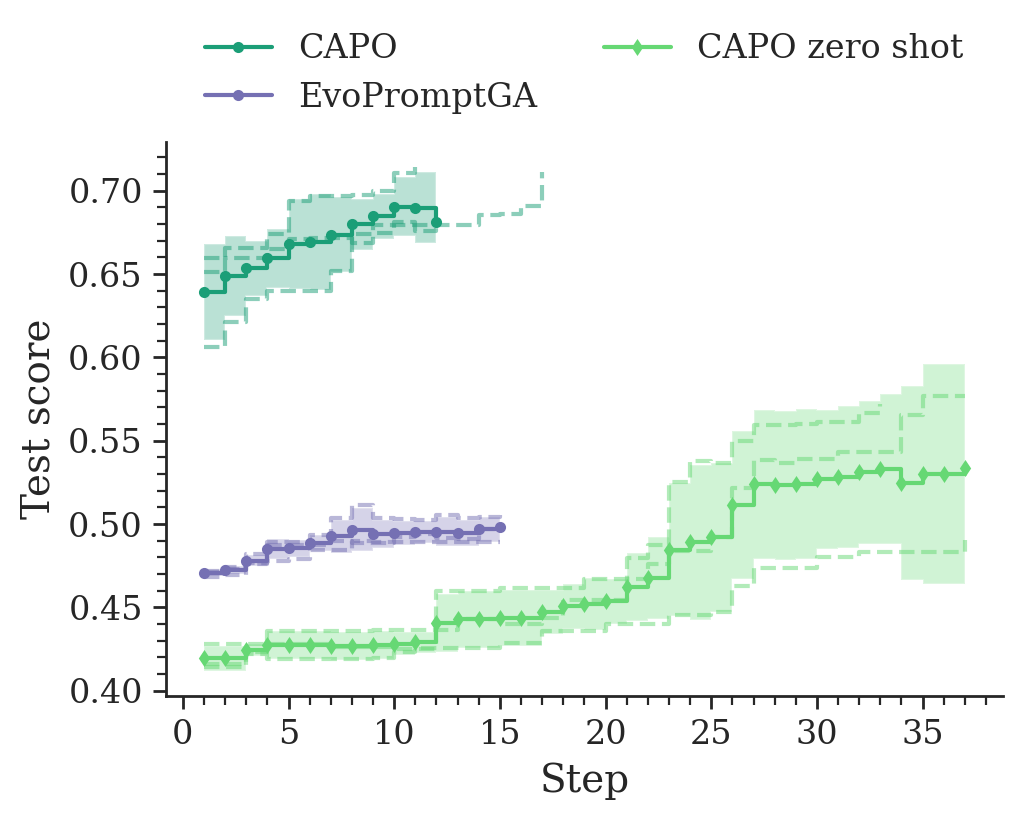

In [30]:
for dataset in ["gsm8k"]:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
        labels=["CAPO", "EvoPromptGA", "CAPO zero shot"],
        path_prefix="../..",
        plot_stddev=True,
        plot_seeds=True,
        x_col="step",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- we can do much more steps without few shots (less token consuming)
- for agnews we get better results in earlier steps when incorporation few-shots
- for gsm8k the shots have a great influence on the performance

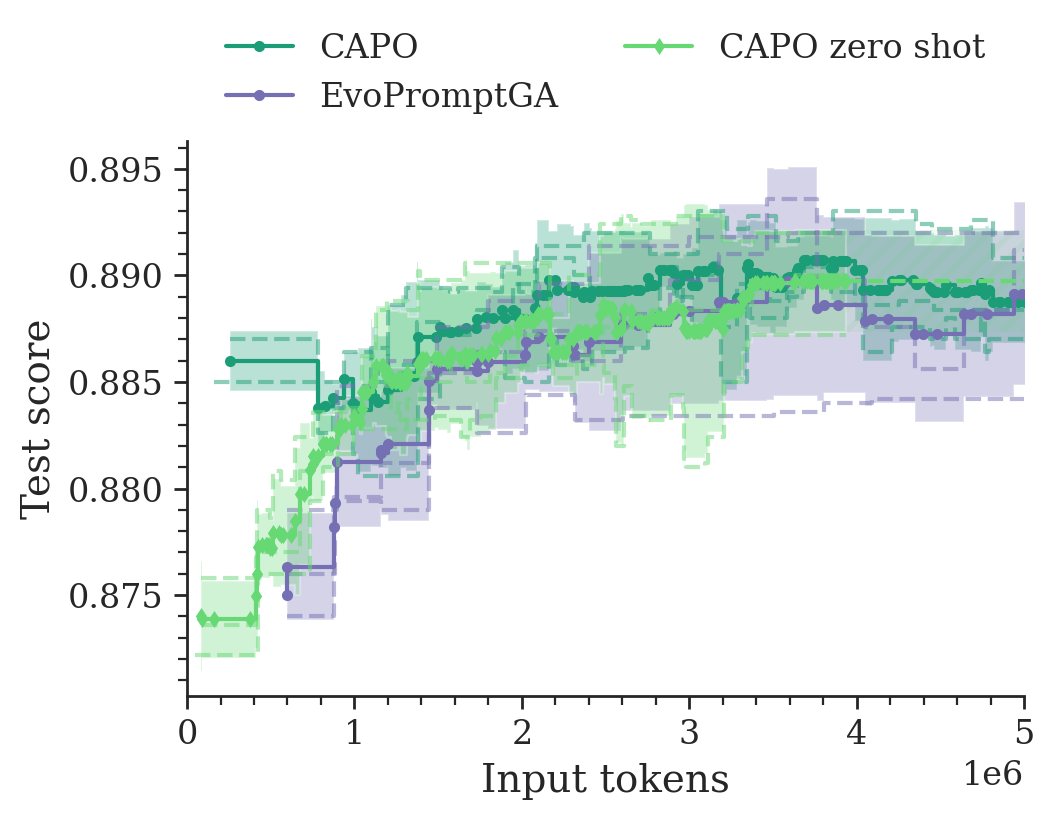

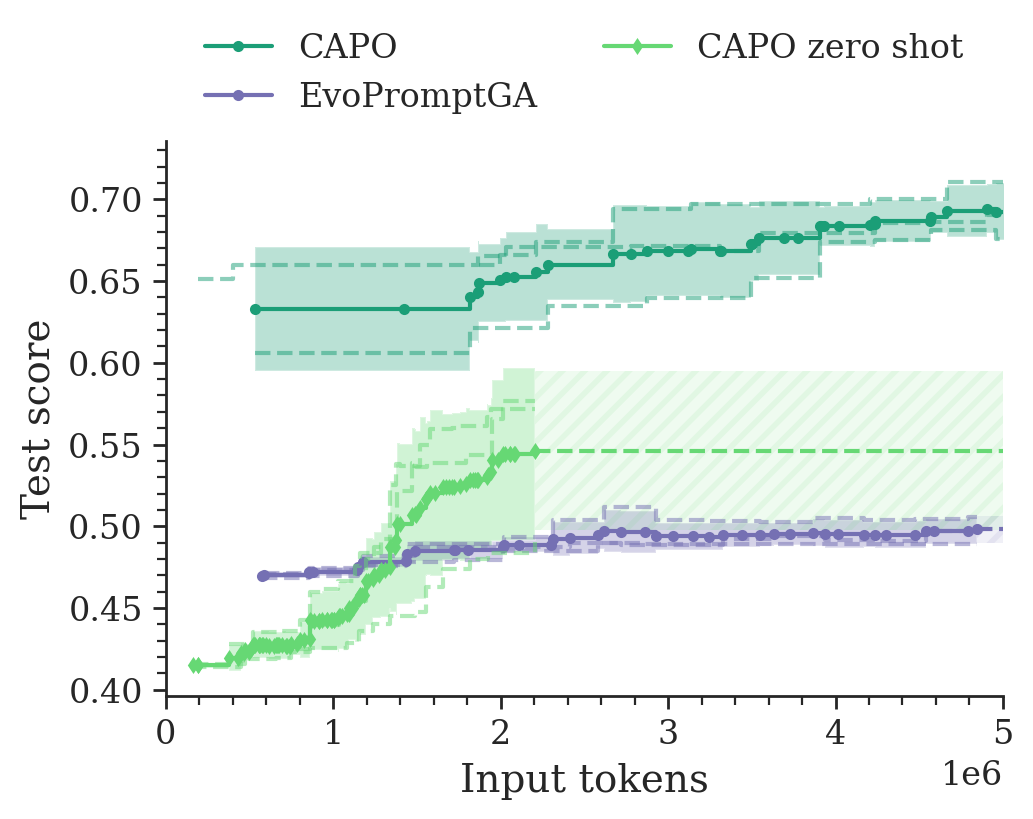

In [18]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
        labels=["CAPO", "EvoPromptGA", "CAPO zero shot"],
        path_prefix="../..",
        plot_stddev=True,
        plot_seeds=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- higher cost efficiency without few shots (good results are early available)
- despite starting not as good as EvoPrompt we manage to take over the lead 


## Generic Initializations

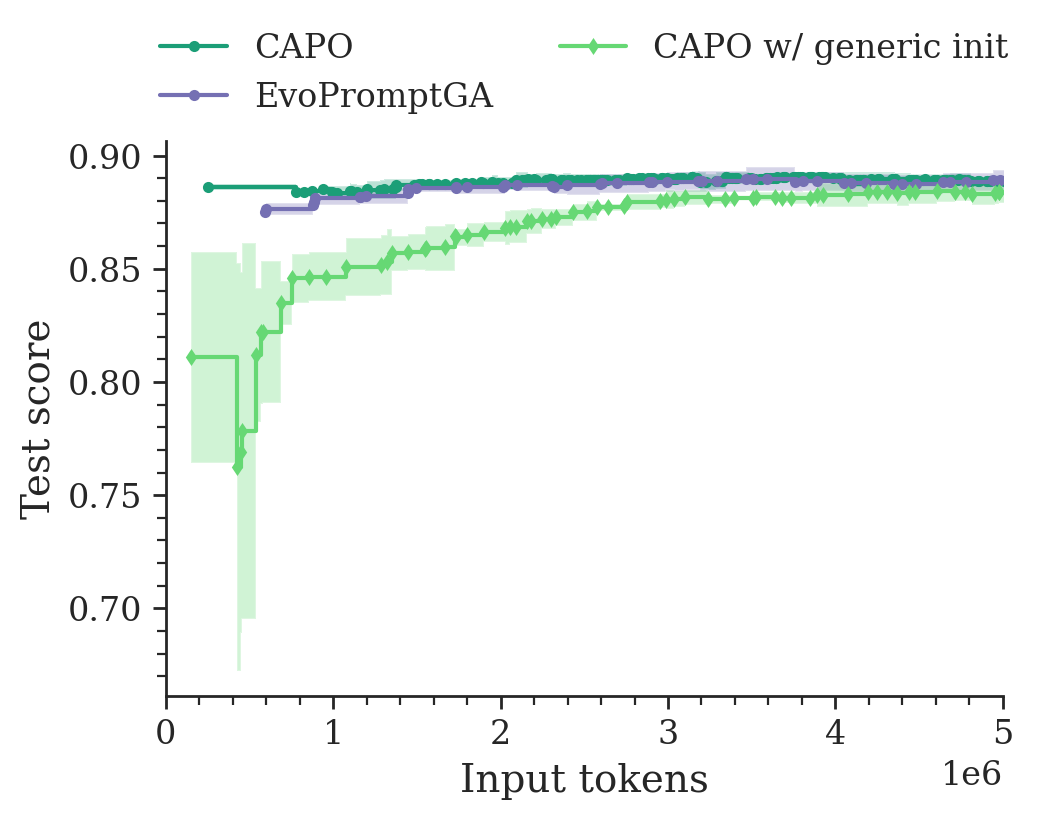

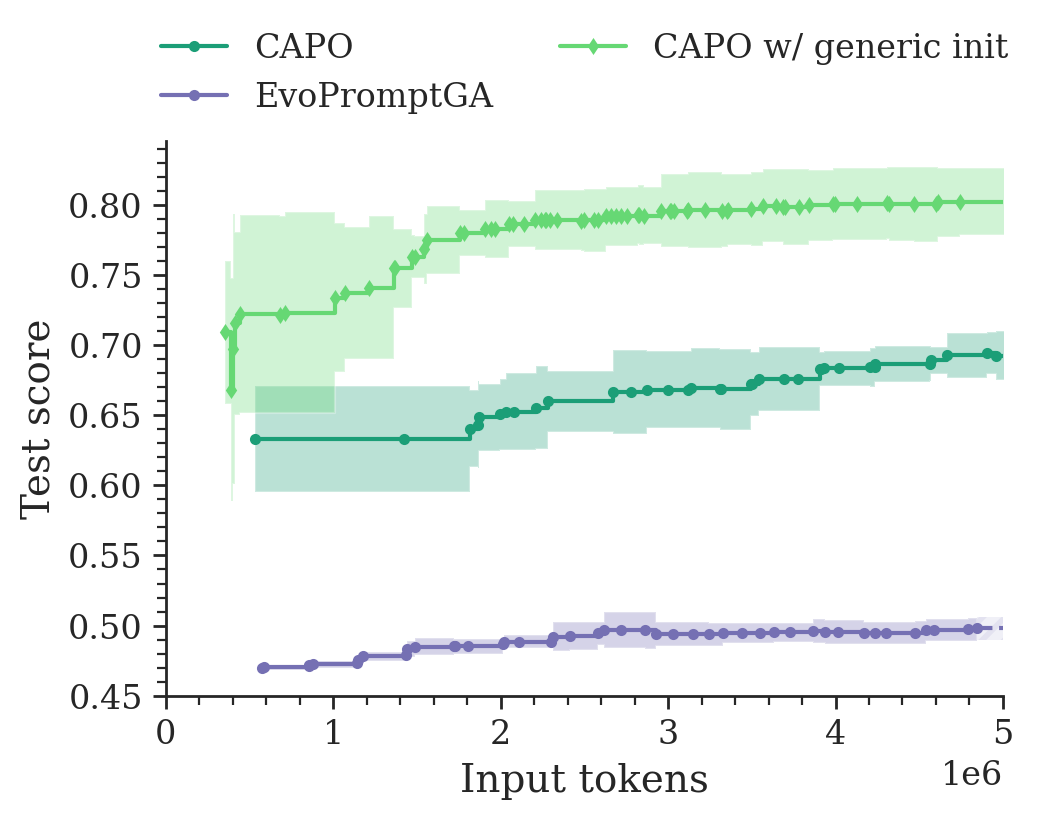

In [43]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_generic_init"],  # , "EvoPromptGA_generic_init"],
        labels=["CAPO", "EvoPromptGA", "CAPO w/ generic init"],  # , "EvoPromptGA w/ generic init"],
        path_prefix="../../",
        plot_stddev=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    )

In [ ]:
generate_comparison_table(
    DATASETS,
    ["CAPO", "EvoPromptGA", "EvoPromptGA_generic_init", "CAPO_generic_init"],
    "llama",
    path_prefix="../..",
)

,agnews,gsm8k,avg
CAPO,88.80±0.92,73.73±4.57,81.27
EvoPromptGA,88.67±0.50,50.87±0.90,69.77
EvoPromptGA_generic_init,23.20±0.00,53.47±0.46,38.33
CAPO_generic_init,89.33±0.23,82.93±2.89,86.13


In [ ]:
generate_comparison_table(
    DATASETS,
    ["CAPO", "EvoPromptGA", "EvoPromptGA_generic_init", "CAPO_generic_init"],
    "llama",
    path_prefix="../..",
    score_col="prompt_len",
)

,agnews,gsm8k,avg
CAPO,110.33±55.81,480.67±138.28,295.50
EvoPromptGA,30.00±1.00,27.67±2.52,28.83
EvoPromptGA_generic_init,17.00±9.85,20.33±2.31,18.67
CAPO_generic_init,182.00±26.85,205.67±138.08,193.83


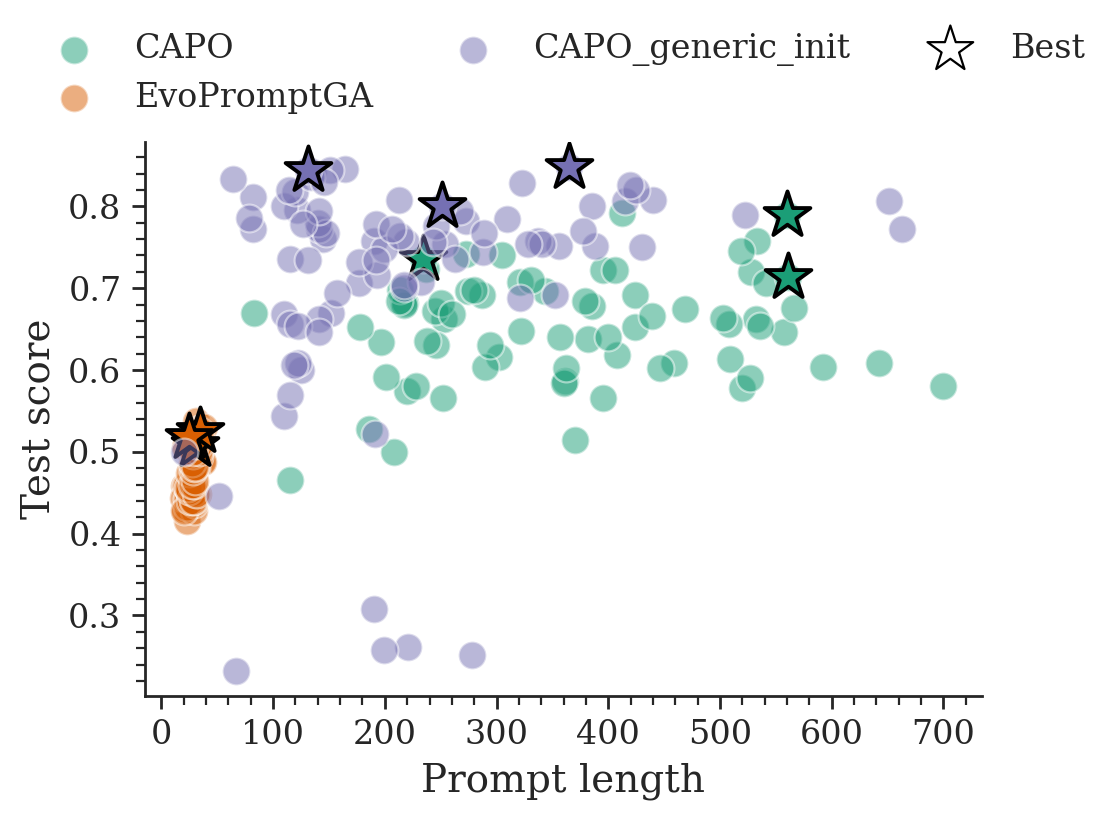

In [ ]:
plot_length_score(
    "gsm8k",
    "llama",
    ["CAPO", "EvoPromptGA", "CAPO_generic_init"],
    x_col="prompt_len",
    score_col="test_score",
    path_prefix="../..",
    log_scale=False,
);

In [53]:
print(
    get_results("gsm8k", "llama", "CAPO_generic_init", path_prefix="../../")
    .groupby("prompt", as_index=False)
    .first()
    .sort_values("test_score", ascending=False)
    .iloc[0]["prompt"]
)  # .item())

Examine this query thoroughly and deliver your conclusions. All output must be encapsulated in <final_answer> </final_answer> notation for processing purposes.

Input:
Mark wants to build a pyramid of soda cases that's four levels tall. Each level of the pyramid has a square base where each side is one case longer than the level above it. The top level is just one case. How many cases of soda does Mark need?
Output:
To determine the total number of cases Mark needs, we need to calculate the number of cases in each level of the pyramid and then sum them up.

The top level has 1 case, since it's just one case.

The second level has a square base with 2 cases on each side, so it has 2 * 2 = 4 cases.

The third level has a square base with 3 cases on each side, so it has 3 * 3 = 9 cases.

The fourth level has a square base with 4 cases on each side, so it has 4 * 4 = 16 cases.

Now, we add up the number of cases in each level: 1 + 4 + 9 + 16 = 30.

<final_answer> 30 </final_answer>

Input:

## EvoPrompt Simplified Template

Failed to load agnews for nan: No objects to concatenate
Failed to load agnews for nan: No objects to concatenate
Failed to load gsm8k for nan: No objects to concatenate
Failed to load gsm8k for nan: No objects to concatenate


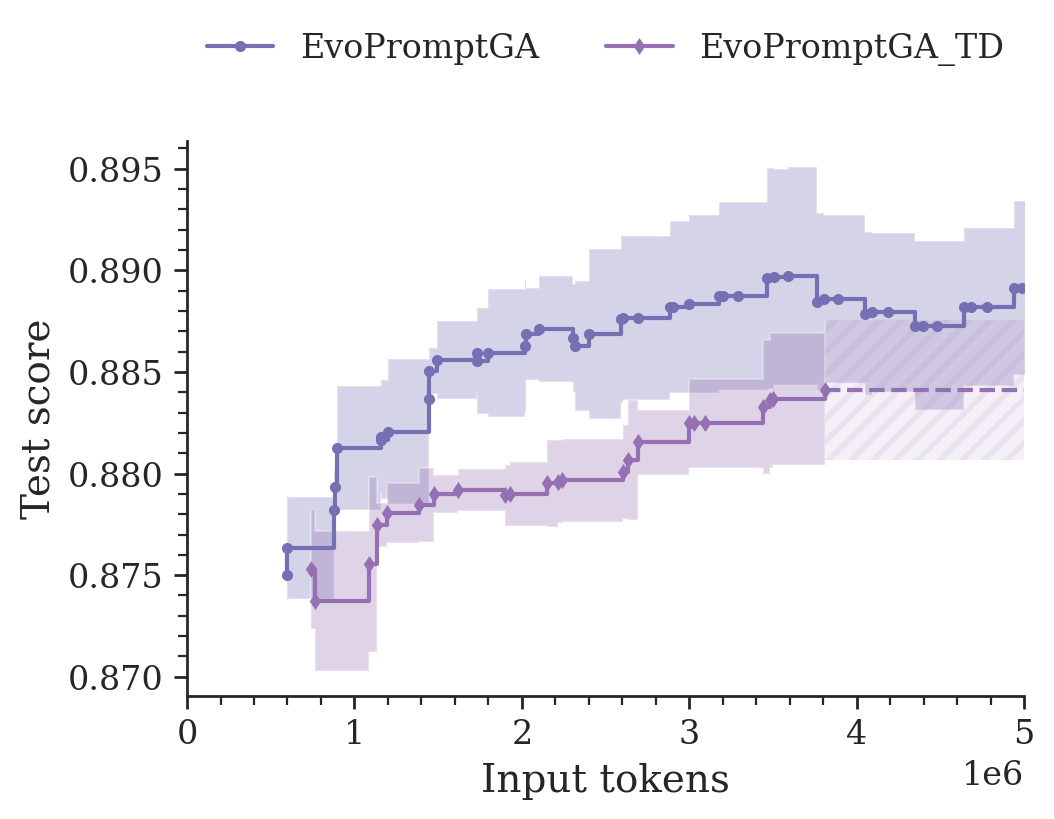

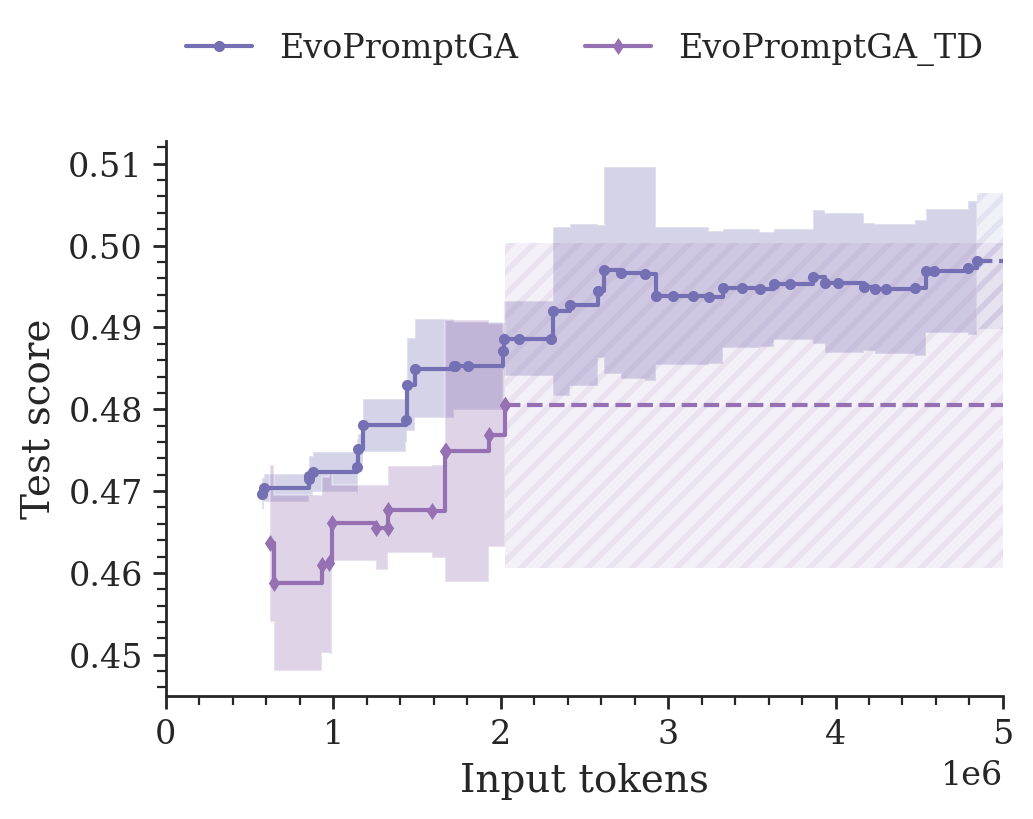

In [54]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["nan", "EvoPromptGA", "nan", "EvoPromptGA_TD"],
        path_prefix="../..",
        plot_stddev=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- using our simplified template (which also incorporates a task description) we perform slightly worse than the vanilla EvoPromptGA
- lets move this in the appendix

## Plot multiple into one

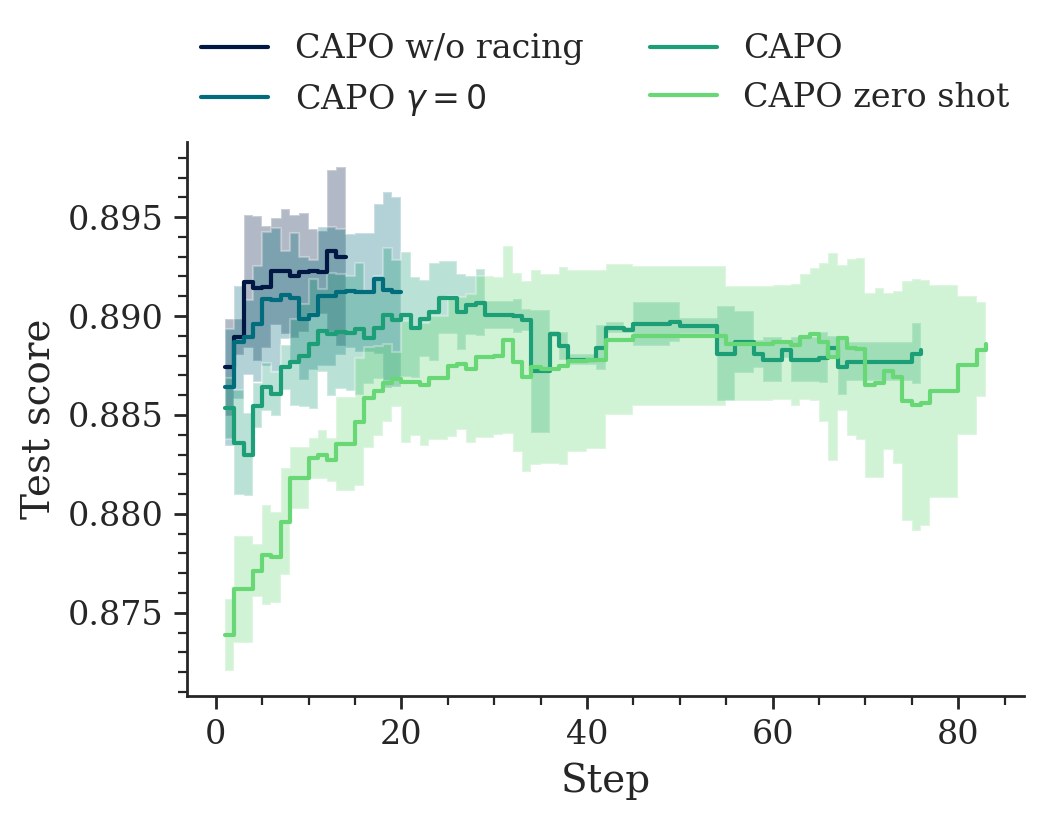

In [70]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    continuous_colors=True,
    path_prefix="../..",
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

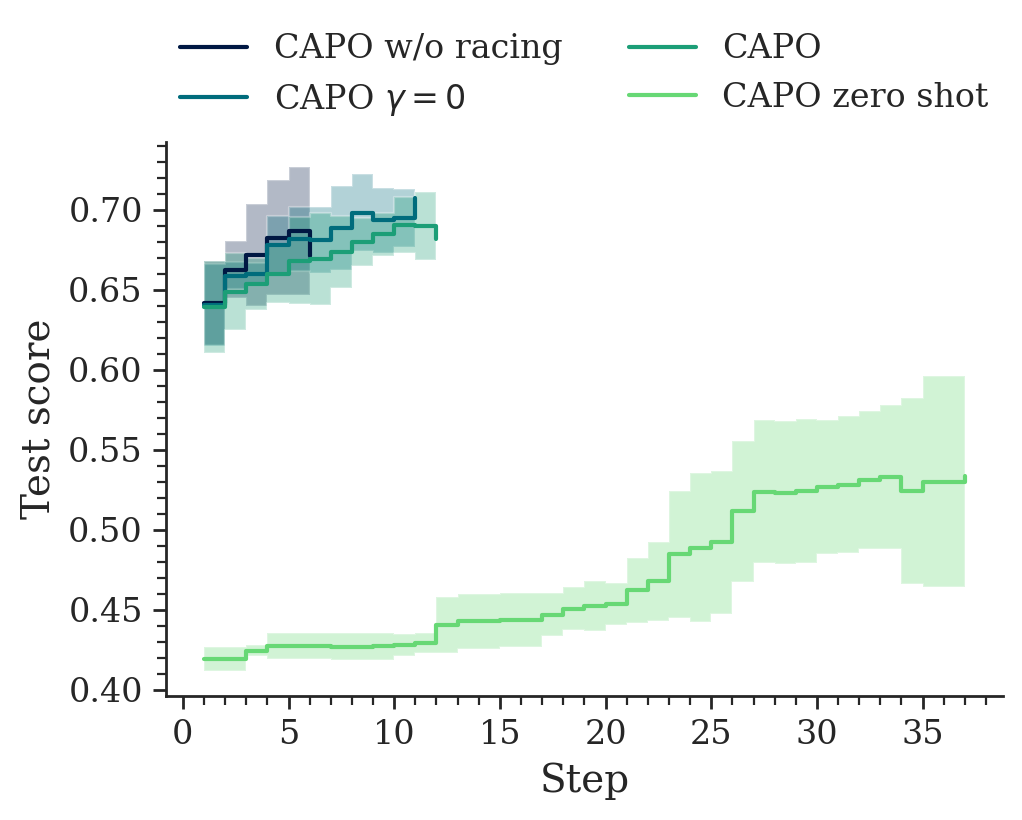

In [71]:
plot_population_scores_comparison(
    "gsm8k",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    continuous_colors=True,
    path_prefix="../..",
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

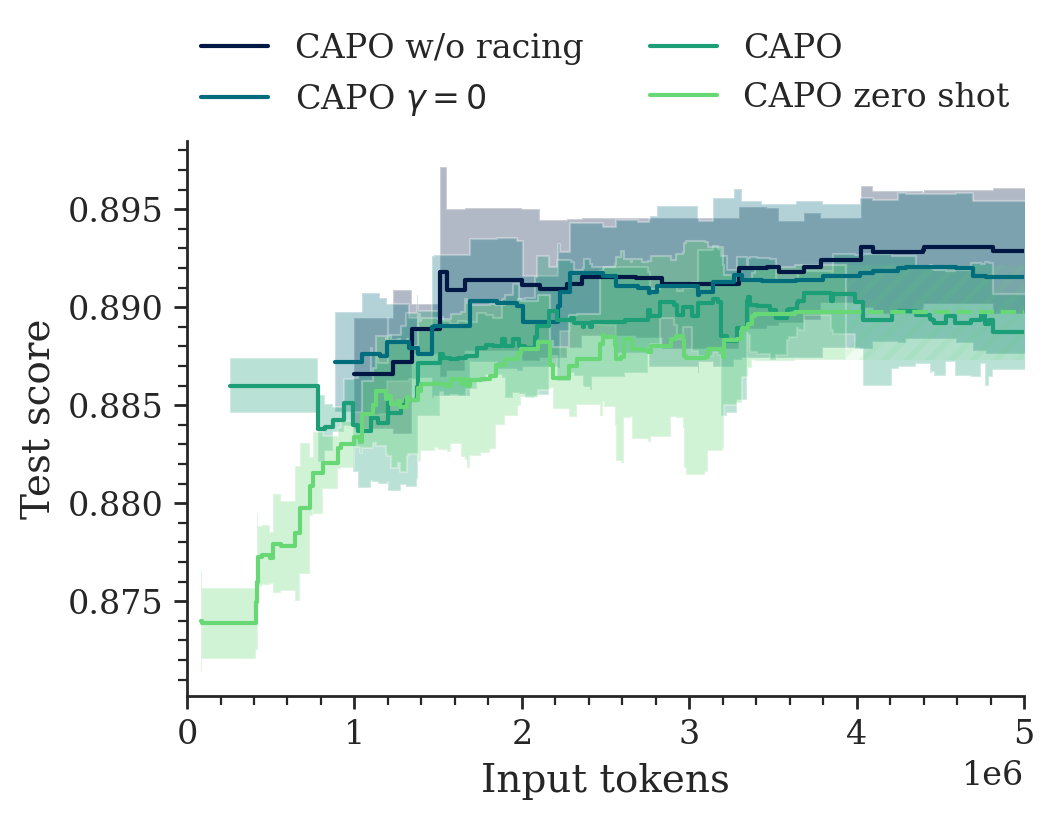

In [73]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    x_col="input_tokens_cum",
    continuous_colors=True,
    path_prefix="../..",
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

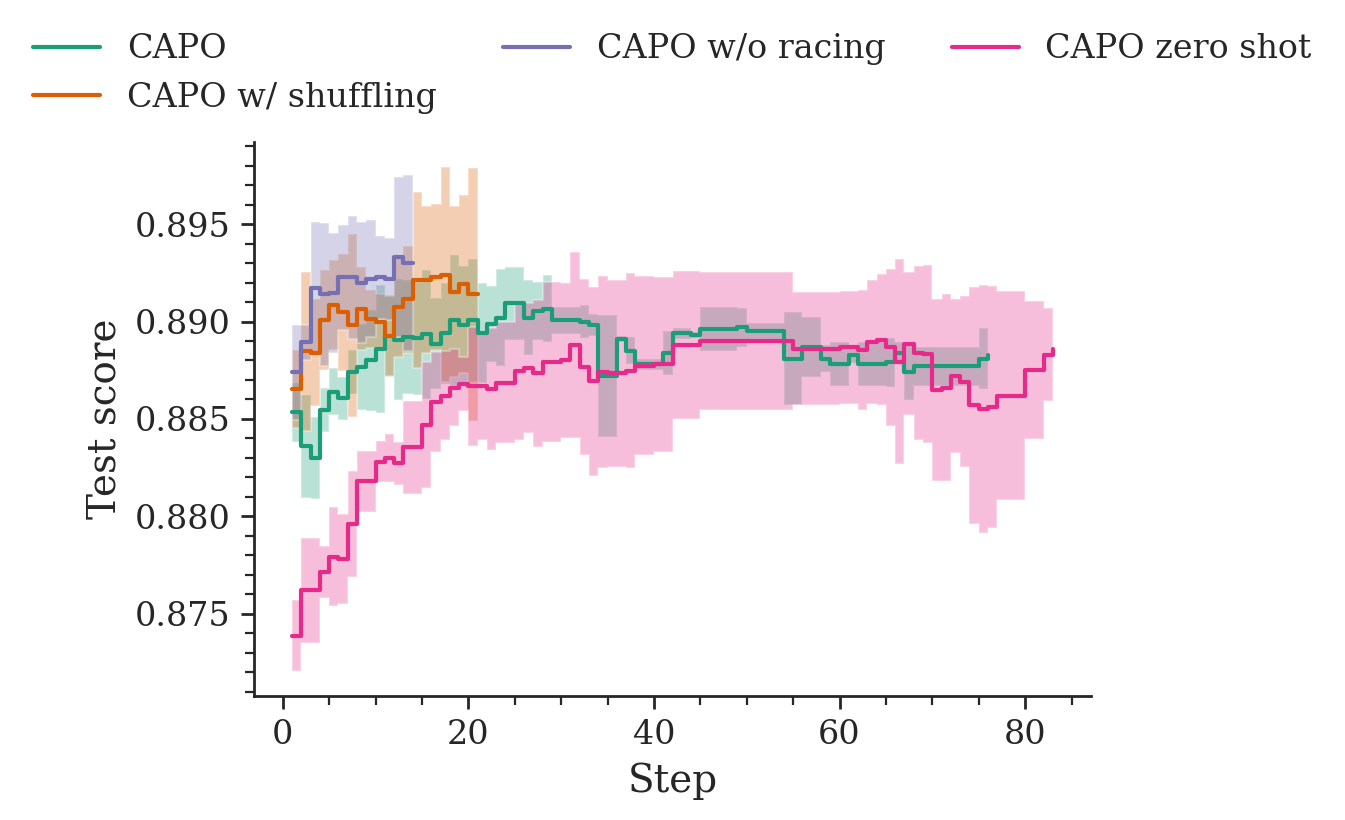

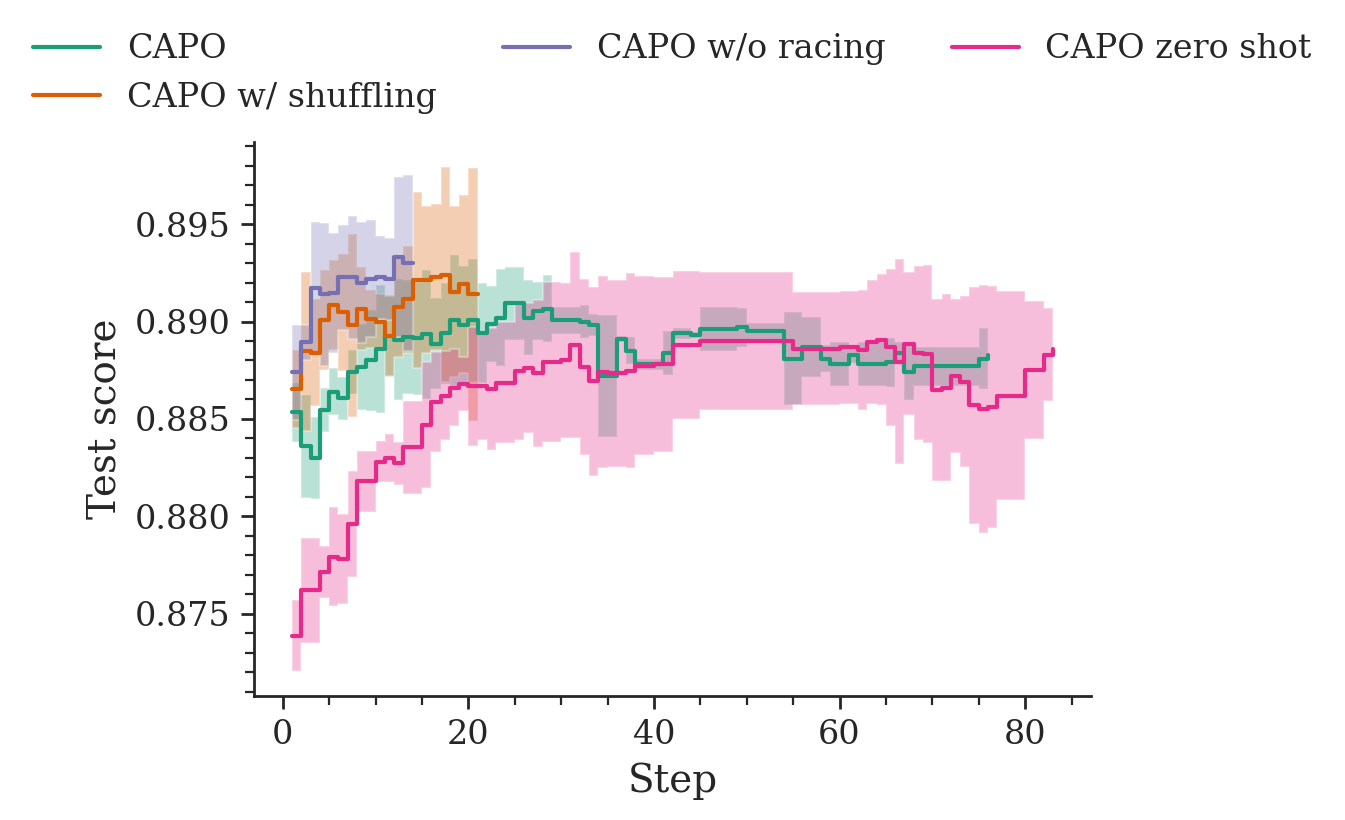

In [ ]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO", "CAPO_shuffling", "CAPO_no_racing", "CAPO_zero_shot"],
    labels=["CAPO", "CAPO w/ shuffling", "CAPO w/o racing", "CAPO zero shot"],
    path_prefix="../..",
    plot_stddev=True,
    plot_seeds=False,
)

In [88]:
generate_comparison_table(
    datasets=["agnews", "gsm8k"],
    optims=[
        "CAPO",
        "CAPO_zero_shot",
        "CAPO_no_lp",
        "CAPO_no_racing",
        "CAPO_generic_init",
        "EvoPromptGA",
    ],
    model="llama",
    path_prefix="../..",
)

,agnews,gsm8k,avg
CAPO,88.80Â±0.75,73.73Â±3.73,81.27
CAPO_zero_shot,89.00Â±0.16,62.40Â±6.15,75.70
CAPO_no_lp,89.27Â±0.41,74.93Â±1.04,82.10
CAPO_no_racing,89.20Â±0.43,75.00Â±3.12,82.10
CAPO_generic_init,89.33Â±0.19,82.93Â±2.36,86.13
EvoPromptGA,88.67Â±0.41,50.87Â±0.74,69.77


In [87]:
generate_comparison_table(
    datasets=["agnews", "gsm8k"],
    optims=[
        "CAPO",
        "CAPO_zero_shot",
        "CAPO_no_lp",
        "CAPO_no_racing",
        "CAPO_generic_init",
        "EvoPromptGA",
    ],
    model="llama",
    path_prefix="../..",
    score_col="prompt_len",
)

,agnews,gsm8k,avg
CAPO,110.33Â±45.57,480.67Â±112.90,295.50
CAPO_zero_shot,48.00Â±3.56,93.67Â±16.76,70.83
CAPO_no_lp,127.67Â±27.21,297.00Â±26.55,212.33
CAPO_no_racing,146.33Â±51.77,468.67Â±129.87,307.50
CAPO_generic_init,182.00Â±21.92,205.67Â±112.74,193.83
EvoPromptGA,30.00Â±0.82,27.67Â±2.05,28.83
